In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
# generating X
np.random.seed(1)
X= np.vstack((np.random.uniform(-10,10, 2000),np.random.uniform(-10,10, 2000),np.random.uniform(-10,10, 2000),
              np.random.normal(0,10, 2000),np.random.normal(0,10, 2000),np.random.normal(0,10, 2000),np.random.normal(0,10, 2000)))
X = np.transpose(X)
X

array([[ -1.65955991,   1.53955693,  -2.82307933, ...,   8.70106536,
         -6.09463357,   9.24038414],
       [  4.40648987,   7.50777477,   3.07502945, ...,   7.03362853,
        -11.85608594,  -8.68444187],
       [ -9.9977125 ,   2.17130874,   1.33182816, ...,  -9.57910711,
        -14.47502929,  -0.61673675],
       ...,
       [  6.57465703,  -8.53119667,  -9.47617961, ...,   4.38033001,
          0.6548405 ,  -4.84251319],
       [ -9.3800408 ,   1.59474094,   9.01655979, ...,  -3.27646889,
          4.66771873,  12.56088856],
       [  8.93456539,   4.67034037,   1.39835285, ...,   8.29215446,
        -25.39555851,  -6.87223888]])

In [3]:
# generating p
p = 1/(1 + np.exp(-(X[:,0] * np.sqrt(np.abs(X[:,3])+1) + np.sin(X[:,2]) - np.abs(X[:,1]) / np.sqrt(np.abs(X[:,4])+1) + 1.5 * np.abs(X[:,5]) + X[:,6])))

In [4]:
# generating y
np.random.seed(2)
y = np.random.binomial(1,p,len(p))

In [5]:
# split data into train and test
X_tr = X[:1000,:]
X_tst = X[1000:,:]
y_tr = y[:1000]
y_tst = y[1000:]

In [6]:
# fitting SVM
C = [0.1,0.5,1,5,10,30,50,70,90,150]
err_rate = []
y_pred_linear = []
for c in range(len(C)):
    svm_lin = SVC(C= C[c],kernel = 'linear')
    svm_lin.fit(X_tr,y_tr)
    y_pred = svm_lin.predict(X_tst)
    y_pred_linear.append(y_pred)
    err = np.sum(y_tst != y_pred) / len(y_tst)
    err_rate.append(err)

Text(0.5, 1.0, 'Error rate of each C')

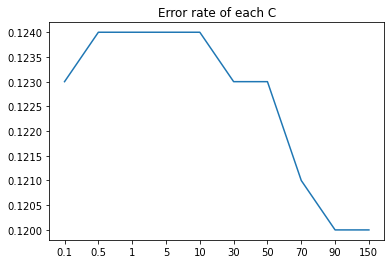

In [7]:
# plotting
plt.plot(list(map(str,C)),err_rate)
plt.title("Error rate of each C")

In [9]:
print(err_rate[np.argmin(err_rate)], C[np.argmin(err_rate)])

0.12 90


In [10]:
# fitting non-linear SVM
err_rate2 = []
y_pred_rbf = []
for c in range(len(C)):
    svm_rbf = SVC(C= C[c],kernel = 'rbf')
    svm_rbf.fit(X_tr,y_tr)
    y_pred = svm_rbf.predict(X_tst)
    y_pred_rbf.append(y_pred)
    err = np.sum(y_tst != y_pred) / len(y_tst)
    err_rate2.append(err)

Text(0.5, 1.0, 'Error rate of each C')

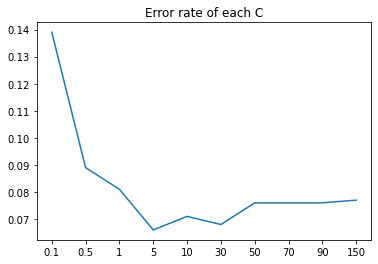

In [11]:
# plotting
plt.plot(list(map(str,C)),err_rate2)
plt.title("Error rate of each C")

In [12]:
print(err_rate2[np.argmin(err_rate2)],C[np.argmin(err_rate2)])

0.066 5


In [13]:
result_linear = pd.DataFrame()
result_linear['Actual Class'] = y_tst
result_linear['Predicted Class'] = y_pred_linear[np.argmin(err_rate)]

result_rbf = pd.DataFrame()
result_rbf['Actual Class'] = y_tst
result_rbf['Predicted Class'] = y_pred_rbf[np.argmin(err_rate2)]

In [14]:
ytype = np.sort(np.unique(y))

#confusion matrix of linear svm
C = []
for i in range(len(ytype)):
    for j in range(len(ytype)):
        C.append(((result_linear['Actual Class'] == ytype[i]) & (result_linear['Predicted Class'] == ytype[j])).sum())

C_linear = pd.DataFrame(np.array(C).reshape(len(ytype),len(ytype)),
                  index = ytype, columns = ytype)
acc_linear = round(np.diag(C_linear).sum()/C_linear.sum().sum(),3)

In [15]:
# confusion matrix of rbf svm
C = []
for i in range(len(ytype)):
    for j in range(len(ytype)):
        C.append(((result_rbf['Actual Class'] == ytype[i]) & (result_rbf['Predicted Class'] == ytype[j])).sum())

C_rbf = pd.DataFrame(np.array(C).reshape(len(ytype),len(ytype)),
                  index = ytype, columns = ytype)
acc_rbf = round(np.diag(C_rbf).sum()/C_rbf.sum().sum(),3)

In [16]:
out_name = input("Enter the output file name to export [(ex) result.txt] : ")

C_linear.to_csv('temp2.txt', sep = '\t')
temp2 = []
temp2.append('\tPredicted Class \n')
r = open('temp2.txt','r')
for line in r.readlines():
    temp2.append(line)
r.close()    
for i in range(len(temp2)):
    if i == 2:
        temp2[i] = 'Actual \t' + temp2[i]+ '\n'
    elif i == 3:
        temp2[i] = 'Class \t' + temp2[i]+ '\n'
    else:
        temp2[i] = '\t' + temp2[i]+ '\n'

C_rbf.to_csv('temp3.txt', sep = '\t')        
temp3 = []
temp3.append('\tPredicted Class \n')
r = open('temp3.txt','r')
for line in r.readlines():
    temp3.append(line)
r.close()    
for i in range(len(temp3)):
    if i == 2:
        temp3[i] = 'Actual \t' + temp3[i]+ '\n'
    elif i == 3:
        temp3[i] = 'Class \t' + temp3[i]+ '\n'
    else:
        temp3[i] = '\t' + temp3[i]+ '\n'



f = open(out_name, 'w+')
f.write(f'Linear Kernel SVM (C = 90)\n')
f.write('Confusion Matrix (SVM-linear) \n')
f.write('---------------------------------\n')
for line in temp2:
    f.write(line)
f.write('\n')
f.write('Model Summary (SVM-linear) \n')
f.write('---------------------------------\n')
f.write(f'Overall accuracy = {acc_linear}')
f.write('\n\n')
f.write('RBF Kernel SVM (C = 5)\n')
f.write('Confusion Matrix (SVM-rbf) \n')
f.write('---------------------------------\n')
for line in temp3:
    f.write(line)
f.write('\n')
f.write('Model Summary (SVM-rbf) \n')
f.write('---------------------------------\n')
f.write(f'Overall accuracy = {acc_rbf}')

f.close()

r = open(out_name,'r')
for line in r.readlines():
    print(line)
r.close()
os.remove('temp2.txt')        
os.remove('temp3.txt')

Enter the output file name to export [(ex) result.txt] :  result.txt


Linear Kernel SVM (C = 90)

Confusion Matrix (SVM-linear) 

---------------------------------

		Predicted Class 



		0	1



Actual 	0	245	57



Class 	1	63	635





Model Summary (SVM-linear) 

---------------------------------

Overall accuracy = 0.88



RBF Kernel SVM (C = 5)

Confusion Matrix (SVM-rbf) 

---------------------------------

		Predicted Class 



		0	1



Actual 	0	266	36



Class 	1	30	668





Model Summary (SVM-rbf) 

---------------------------------

Overall accuracy = 0.934
